In [1521]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [1522]:
from tqdm import tqdm_notebook as tqdm
import numpy as np

In [1523]:
import torch as T
import torch.nn as nn

In [1821]:
import sys
sys.path.append('/home2/wsdm/gyy/sjh_project/pku-lab/pytorch-a2c-ppo-acktr-gail')

In [1526]:
sys.path

['/home2/wsdm/yy/workplace/rllab',
 '/home2/wsdm/anaconda3/envs/mbpo/lib/python36.zip',
 '/home2/wsdm/anaconda3/envs/mbpo/lib/python3.6',
 '/home2/wsdm/anaconda3/envs/mbpo/lib/python3.6/lib-dynload',
 '',
 '/home2/wsdm/.local/lib/python3.6/site-packages',
 '/home2/wsdm/anaconda3/envs/mbpo/lib/python3.6/site-packages',
 '/home2/wsdm/gyy/sjh_project/pku-lab/mbpo/viskit',
 '/home2/wsdm/gyy/sjh_project/pku-lab/mbpo',
 '/home2/wsdm/gyy/sjh_project/pku-lab/baselines',
 '/home2/wsdm/anaconda3/envs/mbpo/lib/python3.6/site-packages/IPython/extensions',
 '/home2/wsdm/.ipython',
 'a2c_ppo_acktr',
 'a2c_ppo_acktr',
 'a2c_ppo_acktr',
 '/home2/wsdm/gyy/sjh_project/pku-lab/a2c_ppo_acktr',
 '/home2/wsdm/gyy/sjh_project/pku-lab/a2c_ppo_acktr',
 '/home2/wsdm/gyy/sjh_project/pku-lab/pytorch-a2c-ppo-acktr-gail/a2c_ppo_acktr',
 '/home2/wsdm/gyy/sjh_project/pku-lab/pytorch-a2c-ppo-acktr-gail',
 '/home2/wsdm/gyy/sjh_project/pku-lab/pytorch-a2c-ppo-acktr-gail',
 '/home2/wsdm/gyy/sjh_project/pku-lab/pytorch-a2

In [2219]:
env_names = ['HalfCheetah-v2', 'Hopper-v2', 'Ant-v2', 'Reacher-v2']
env_id = 0
env_name = env_names[env_id]

In [2220]:
import gym

env = gym.make(env_name)
print(env.observation_space.shape, env.action_space.shape)
dX = env.observation_space.shape[0]
dU = env.action_space.shape[0]
print(dX, dU)

# env.reset()
# for _ in range(1000):
#    env.render()
#    env.step(env.action_space.sample()) # take a random action

for i in range(6):
    env.reset()
    rew = 0
    
    while True:
        _, r, done, _ = env.step(env.action_space.sample())
        
        rew += r
        
        if done==True:
            print('Ep %d: %.2f' % (i+1, rew))
            
            break

/home2/wsdm/anaconda3/envs/mbpo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(17,) (6,)
17 6
Ep 1: -328.07
Ep 2: -241.17
Ep 3: -201.04
Ep 4: -178.75
Ep 5: -312.14
Ep 6: -282.04


In [2221]:
import pickle

trajs_demo, demo_st_info, demo_rew_info = pickle.load(open('Demo/my_demo_'+env_name+'.pkl', 'rb'))
print(len(trajs_demo), len(trajs_demo[0]))
# print(trajs_demo[0][0][0].dtype)
print(trajs_demo[0][0][0])
print(trajs_demo[0][0][1])
print(trajs_demo[0][1][0])
print(trajs_demo[0][1][1])
print(trajs_demo[0][2][0])
print(trajs_demo[0][2][1])
print(trajs_demo[0][3][0])
print(trajs_demo[0][3][1])
print(demo_st_info[0][0])
print(demo_st_info[1][0])

demo_observations = []
demo_actions = []
for traj in trajs_demo:
    for dat in traj:
        obs, act, new_obs, _ = dat
        demo_observations.append(obs)
        demo_actions.append(act)
        
print('number of demo observations: ', len(demo_observations))
print('number of demo actions: ', len(demo_actions))    

demo_O_mean = np.mean(demo_observations, axis=0)
demo_O_std = np.std(demo_observations, axis=0)
demo_A_mean = np.mean(demo_actions, axis=0)
demo_A_std = np.std(demo_actions, axis=0)
print('mean of demo observations: ',demo_O_mean)
print('std of demo observations: ', demo_O_std)
print('mean of demo actions: ',demo_A_mean)
print('std of demo actions: ', demo_A_std)

100 1000
[-0.05514779  0.01413077  0.05431647 -0.07718844 -0.00049597 -0.09359713
  0.0420625   0.0338486  -0.04637919 -0.07595596  0.0203414   0.03111221
  0.09077952 -0.21187306  0.09768369  0.06454459 -0.02387658]
[ 4.6757808e-01  1.4283210e-03  6.5947473e-01  1.8217321e-01
  1.4451610e+00 -5.1731670e-01]
[-0.07202693 -0.01772098  0.15221099 -0.03565283  0.23121198 -0.01841621
  0.33170059 -0.1662426   0.49294502 -0.50951452 -0.75886748  2.57497647
  1.62760945  5.13046556  2.27734184  7.41693052 -5.22591411]
[ 0.54515547  0.33950102  0.29747805  0.6972709   1.1975483  -0.50355154]
[-0.11176169 -0.08448181  0.31225425  0.17700579  0.2379468   0.2849727
  0.44529777 -0.45882151  0.72204616 -1.03220343 -1.31037863  3.22701093
  4.05066736 -1.43649638  7.04318367  1.28284355 -3.77430341]
[ 0.8011819   0.23011546  0.5274805   1.0458543   1.4034928  -0.64960414]
[-0.1772751  -0.12200063  0.46834402  0.21548037  0.24988779  0.66666613
  0.49098657 -0.48806973  0.62554882 -1.45787828 -0.33

In [2222]:
def O_normalizing(x):
    a = x - demo_O_mean
    b = demo_O_std
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)
def A_normalizing(x):
    a = x - demo_A_mean
    b = demo_A_std
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)
def O_recovering(x):
    return np.nan_to_num(x * demo_O_std + demo_O_mean)
def A_recovering(x):
    return np.nan_to_num(x * demo_A_std + demo_A_mean)

In [2223]:
demo_observations_norm = []
demo_actions_norm = []
for o in demo_observations:
    demo_observations_norm.append(O_normalizing(o))
for a in demo_actions:
    demo_actions_norm.append(A_normalizing(a))
    
demo_O_norm_mean = np.mean(demo_observations_norm, axis=0)
demo_O_norm_std = np.std(demo_observations_norm, axis=0)
demo_A_norm_mean = np.mean(demo_actions_norm, axis=0)
demo_A_norm_std = np.std(demo_actions_norm, axis=0)
print('mean of demo observations after norm: ',demo_O_norm_mean)
print('std of demo observations after norm: ', demo_O_norm_std)
print('mean of demo actions after norm: ',demo_A_norm_mean)
print('std of demo actions after norm: ', demo_A_norm_std)

mean of demo observations after norm:  [ 3.37679340e-14 -1.09075972e-13 -3.42399442e-15 -2.29559038e-15
 -6.01547223e-15 -9.72555370e-17 -3.19091420e-15 -4.28386215e-16
 -2.69595035e-14  5.42956791e-16 -6.20193740e-17 -1.95872207e-16
 -1.85667454e-17  2.67730282e-17 -3.14201443e-16  7.09970971e-17
 -1.04518616e-16]
std of demo observations after norm:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean of demo actions after norm:  [ 1.2536609e-06  4.3133409e-06 -1.3447824e-06  1.4005958e-07
  3.1584801e-08 -1.3115019e-07]
std of demo actions after norm:  [0.9999979 1.0000002 1.0000023 1.0000002 1.000008  0.9999979]


In [2224]:
print(demo_observations_norm[0:3])
print(demo_actions_norm[0:3])

[array([ 5.86431900e+00, -9.05585876e+00, -3.01826134e-01,  2.26589325e-01,
       -8.06245074e-01, -2.22211375e-01, -4.89587978e-02, -9.16634164e-02,
       -2.08996955e+00, -1.61672505e-01,  2.32280342e-03, -1.87374925e-02,
        9.27458995e-03, -2.70580454e-02, -1.50915217e-02,  2.15453684e-02,
        1.15263660e-04]), array([ 5.64285616, -9.14364736, -0.05249746,  0.31124472,  0.22048949,
       -0.1018104 ,  0.67278857, -1.04635227, -1.55273901, -0.65615573,
       -0.52067574,  0.30448087,  0.16797441,  0.83793219,  0.17932269,
        0.82118271, -0.94407157]), array([ 5.12151586, -9.327651  ,  0.35511856,  0.74467282,  0.25033256,
        0.38406181,  0.9558607 , -2.44232486, -1.32452725, -1.25229409,
       -0.89084545,  0.38732708,  0.41819003, -0.2253396 ,  0.6044111 ,
        0.15404621, -0.68059948])]
[array([ 0.17475496,  0.3421933 ,  1.0769335 ,  0.12584761,  2.720655  ,
       -1.8464307 ], dtype=float32), array([ 0.3123897 ,  0.73254615,  0.04834988,  0.77963144,  2

In [2225]:
from torch.utils.data import Dataset, DataLoader

class DS_Inv(Dataset):
    def __init__(self, trajs):
        self.dat = []
        
        for traj in trajs:
            for dat in traj:
                obs, act, new_obs, triple_index = dat
                
                self.dat.append(np.array([O_normalizing(obs), O_normalizing(new_obs), A_normalizing(act), triple_index]))
    
    def __len__(self):
        return len(self.dat)
    
    def __getitem__(self, idx):
        obs, new_obs, act, triple_index = self.dat[idx]
        
        return obs, new_obs, act, triple_index
    


In [2227]:
print(demo_DS_Inv.__getitem__(0))
print("-" * 80)
print(trajs_demo[0][0])

(array([ 0.97410303,  1.048857  , -0.23440407,  0.23690283, -1.9266481 ,
       -0.8393571 , -0.10077251,  0.25461867,  2.1475408 ,  1.2477115 ,
        0.        ], dtype=float32), array([ 0.97435443,  1.04895295, -0.23308636,  0.23601929, -1.92664801,
       -0.83935707, -0.03027357,  0.21901877,  2.14756814,  1.24829732,
        0.        ]), array([ 0.6625731, -0.3265949], dtype=float32), array([0, 0]))
--------------------------------------------------------------------------------
[array([-0.05514779,  0.01413077,  0.05431647, -0.07718844, -0.00049597,
       -0.09359713,  0.0420625 ,  0.0338486 , -0.04637919, -0.07595596,
        0.0203414 ,  0.03111221,  0.09077952, -0.21187306,  0.09768369,
        0.06454459, -0.02387658]), array([ 4.6757808e-01,  1.4283210e-03,  6.5947473e-01,  1.8217321e-01,
        1.4451610e+00, -5.1731670e-01], dtype=float32), array([-0.07202693, -0.01772098,  0.15221099, -0.03565283,  0.23121198,
       -0.01841621,  0.33170059, -0.1662426 ,  0.49294502

## BCO(0)

### step1, generate inverse samples

In [2259]:
M = 100000
trajs_inv = []
inv_st_info = []
inv_rew_info = []
cnt = 0
epn = 0
rews = 0

while True:
    traj = []
    traj_st = []
    traj_rew = []
    rew = 0

    obs = env.reset()
    st = env.sim.get_state()
    traj_st.append(st)
    while True:
        # act = env.action_space.sample()
        act = np.random.normal(demo_A_mean, demo_A_std, dU).astype(np.float32)
        # act = np.zeros(2)
        
        new_obs, r, done, _ = env.step(act)

        traj.append([obs, act, new_obs])
        traj_rew.append(r)
        
        obs = new_obs
        rew += r
        cnt += 1
        st = env.sim.get_state()
        traj_st.append(st)

        if done==True:
            rews += rew
            trajs_inv.append(traj)
            inv_st_info.append(traj_st)
            inv_rew_info.append(traj_rew)
            epn += 1
            break

    if cnt >= M:
        break

rews /= epn


In [2260]:
print(len(trajs_inv), len(trajs_inv[0]))
print('average reward of %d random trajs: %.2f' % (epn, rews))

100 1000
average reward of 100 random trajs: -330.44


In [2261]:
M_dev = 100000
trajs_inv_dev = []
inv_dev_st_info = []
inv_dev_rew_info = []
cnt = 0
epn = 0
rews = 0

while True:
    traj = []
    traj_st = []
    traj_rew = []
    rew = 0

    obs = env.reset()
    st = env.sim.get_state()
    traj_st.append(st)
    while True:
        # act = env.action_space.sample()
        act = np.random.normal(demo_A_mean, demo_A_std, dU).astype(np.float32)
        # act = np.zeros(2)
        
        new_obs, r, done, _ = env.step(act)

        traj.append([obs, act, new_obs])
        traj_rew.append(r)
        
        obs = new_obs
        rew += r
        cnt += 1
        st = env.sim.get_state()
        traj_st.append(st)

        if done==True:
            rews += rew
            trajs_inv_dev.append(traj)
            inv_dev_st_info.append(traj_st)
            inv_dev_rew_info.append(traj_rew)
            epn += 1
            break

    if cnt >= M_dev:
        break

rews /= epn


In [2262]:
print(len(trajs_inv_dev), len(trajs_inv_dev[0]))
print('average reward of %d random trajs: %.2f' % (epn, rews))

100 1000
average reward of 100 random trajs: -347.27


### Add inv triple index

In [2263]:
traj_index = 0
for traj in trajs_inv:
    triple_index = 0
    for triple in traj:
        triple.append(np.array([traj_index, triple_index]))
        triple_index += 1
    traj_index += 1

In [2264]:
print(len(trajs_inv[0]))
print(len(inv_st_info[0]))
print(len(inv_rew_info[0]))
print(trajs_inv[0][0])
print(trajs_inv[0][0][0])
print(trajs_inv[0][0][1])
print(trajs_inv[0][1][0])
print(trajs_inv[0][1][1])
print(trajs_inv[0][2][0])
print(trajs_inv[0][2][1])
print(inv_st_info[0][0])
print(inv_st_info[0][1])

1000
1001
1000
[array([ 0.02271028,  0.02434279,  0.06393868,  0.08352046,  0.00723075,
        0.04267395, -0.00691647,  0.07282949, -0.12695392, -0.05766077,
       -0.01388619,  0.08162828, -0.07372188, -0.12594663,  0.01230115,
       -0.0222567 ,  0.11633374]), array([ 0.48530665,  0.49718362, -0.6969199 , -0.01073017, -0.40378693,
       -0.619034  ], dtype=float32), array([-2.28832822e-03,  1.18772089e-02,  1.59714321e-01,  1.79076991e-01,
       -2.90564410e-01,  6.52260377e-02, -1.05005232e-01, -1.21612482e-01,
       -4.44108354e-02, -7.48339369e-01, -3.19780203e-01,  2.59860536e+00,
        2.51627380e+00, -6.74905722e+00,  2.16517048e-01, -2.57997897e+00,
       -5.50991448e+00]), array([0, 0])]
[ 0.02271028  0.02434279  0.06393868  0.08352046  0.00723075  0.04267395
 -0.00691647  0.07282949 -0.12695392 -0.05766077 -0.01388619  0.08162828
 -0.07372188 -0.12594663  0.01230115 -0.0222567   0.11633374]
[ 0.48530665  0.49718362 -0.6969199  -0.01073017 -0.40378693 -0.619034  ]
[

In [2265]:
traj_index = 0
for traj in trajs_inv_dev:
    triple_index = 0
    for triple in traj:
        triple.append(np.array([traj_index, triple_index]))
        triple_index += 1
    traj_index += 1

In [2266]:
print(len(trajs_inv_dev[0]))
print(len(inv_dev_st_info[0]))
print(len(inv_dev_rew_info[0]))
print(trajs_inv_dev[0][0])
print(trajs_inv_dev[0][0][0])
print(trajs_inv_dev[0][0][1])
print(trajs_inv_dev[0][1][0])
print(trajs_inv_dev[0][1][1])
print(trajs_inv_dev[0][2][0])
print(trajs_inv_dev[0][2][1])
print(inv_dev_st_info[0][0])
print(inv_dev_st_info[0][1])

1000
1001
1000
[array([-0.09168263, -0.06981019, -0.02401561, -0.06010482,  0.09466317,
        0.08499827, -0.09488915, -0.06999623, -0.08160894,  0.05106071,
       -0.02579562, -0.09508993, -0.09688674, -0.00534476,  0.01905766,
        0.03989724,  0.11229962]), array([ 0.35008454,  0.28010136, -0.2377199 ,  0.3578608 ,  0.50038534,
       -0.15050298], dtype=float32), array([-0.078975  , -0.05222383,  0.05284531,  0.1230475 , -0.18982119,
        0.12659877,  0.1144691 , -0.09827096,  0.55986574,  0.08387347,
        0.19847602,  3.29805509,  2.8055943 , -3.83540746,  1.55129628,
        5.53045415, -0.6005152 ]), array([0, 0])]
[-0.09168263 -0.06981019 -0.02401561 -0.06010482  0.09466317  0.08499827
 -0.09488915 -0.06999623 -0.08160894  0.05106071 -0.02579562 -0.09508993
 -0.09688674 -0.00534476  0.01905766  0.03989724  0.11229962]
[ 0.35008454  0.28010136 -0.2377199   0.3578608   0.50038534 -0.15050298]
[-0.078975   -0.05222383  0.05284531  0.1230475  -0.18982119  0.12659877
  0

In [2267]:
import pickle
file_path = 'Inv/my_inv_'+env_name+'.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(([trajs_inv, inv_st_info, inv_rew_info],
                 [trajs_inv_dev, inv_dev_st_info, inv_dev_rew_info]), f)
    f.close()

#### statistical analysis

In [2268]:
inv_observations = []
inv_actions = []
for traj in trajs_inv:
    for dat in traj:
        obs, act, new_obs, _ = dat
        inv_observations.append(obs)
        inv_actions.append(act)
        
print('number of inv observations: ', len(inv_observations))
print('number of inv actions: ', len(inv_actions))    

inv_O_mean = np.mean(inv_observations, axis=0)
inv_O_std = np.std(inv_observations, axis=0)
inv_A_mean = np.mean(inv_actions, axis=0)
inv_A_std = np.std(inv_actions, axis=0)
print('mean of inv observations: ', inv_O_mean)
print('std of inv observations: ', inv_O_std)
print('mean of inv actions: ', inv_A_mean)
print('std of inv actions: ', inv_A_std)

number of inv observations:  100000
number of inv actions:  100000
mean of inv observations:  [-0.16819512  0.79516542  0.17869008 -0.07947992  0.14438009  0.09622169
 -0.03868449  0.00987078 -0.08204005 -0.01197039  0.02296281  0.04140622
 -0.06264299  0.01067214  0.00817421  0.04321798  0.01346708]
std of inv observations:  [0.19892647 1.26831144 0.2324723  0.30311331 0.17707735 0.3549618
 0.29982709 0.22895165 0.70318806 0.77609273 1.57779143 5.11761557
 7.49479838 4.61795603 6.88494372 6.50357883 4.30980408]
mean of inv actions:  [ 0.36644524 -0.29348433  0.28174198  0.08369995 -0.07630549  0.03846281]
std of inv actions:  [0.563836   0.86418724 0.3511869  0.78683025 0.5584134  0.30187386]


In [2269]:
inv_observations_norm = []
inv_actions_norm = []
for o in inv_observations:
    inv_observations_norm.append(O_normalizing(o))
for a in inv_actions:
    inv_actions_norm.append(A_normalizing(a))
    
inv_O_norm_mean = np.mean(inv_observations_norm, axis=0)
inv_O_norm_std = np.std(inv_observations_norm, axis=0)
inv_A_norm_mean = np.mean(inv_actions_norm, axis=0)
inv_A_norm_std = np.std(inv_actions_norm, axis=0)
print('mean of inv observations after norm: ', inv_O_norm_mean)
print('std of inv observations after norm: ', inv_O_norm_std)
print('mean of inv actions after norm: ', inv_A_norm_mean)
print('std of inv actions after norm: ', inv_A_norm_std)

mean of inv observations after norm:  [ 4.38108062e+00 -6.90320086e+00  1.49424430e-02  2.21918981e-01
 -1.64276354e-01  8.17802660e-02 -2.50171710e-01 -2.06068013e-01
 -2.12549197e+00 -8.86955377e-02  4.08227128e-03 -1.74295565e-02
 -6.56849401e-03  8.97475433e-03 -2.30753032e-02  1.92259091e-02
  6.89326095e-03]
std of inv observations after norm:  [2.6100164  3.49567161 0.59208638 0.61778743 0.78465772 0.56846535
 0.74713729 1.0923898  0.70045826 0.88515108 1.05900054 0.65023411
 0.77394585 0.7477038  0.61410131 0.70732202 0.78224355]
mean of inv actions after norm:  [-0.00466377  0.00167504  0.00363762  0.00086128 -0.00687796  0.00152986]
std of inv actions after norm:  [1.000332   0.997826   0.99787396 0.9986778  1.0010633  1.0037211 ]


### step2, update inverse model

In [2270]:
def sim_get_obs(env_id):
    if env_id == 3:
        theta = env.sim.data.qpos.flat[:2]
        return np.concatenate([
            np.cos(theta),
            np.sin(theta),
            env.sim.data.qpos.flat[2:],
            env.sim.data.qvel.flat[:2],
            env.get_body_com("fingertip") - env.get_body_com("target")
        ])
    elif env_id == 0:
        return np.concatenate([
            env.sim.data.qpos.flat[1:],
            env.sim.data.qvel.flat,
        ])
        

In [2272]:
train_data_gen = DataLoader(DS_Inv(trajs_inv), batch_size=256, shuffle=True)
dev_data_gen = DataLoader(DS_Inv(trajs_inv_dev), batch_size=256, shuffle=True)
test_data_gen = DataLoader(DS_Inv(trajs_demo), batch_size=256, shuffle=True)

In [2273]:
dataset_sizes = {'train':len(train_data_gen), 'dev':len(dev_data_gen), 
                 'test':len(test_data_gen)}
dataloaders = {'train':train_data_gen, 'dev':dev_data_gen, 'test':test_data_gen}
print(dataset_sizes)

{'train': 391, 'dev': 391, 'test': 391}


In [2274]:
for obs, next_obs, action, triple_index in train_data_gen:
    cur_st = inv_st_info[triple_index[0][0]][triple_index[0][1]]
    print(triple_index[0])
    print(cur_st)
    env.sim.set_state(cur_st) #restore
    obs_ = sim_get_obs(env_id)
    print(O_recovering(obs[0].numpy()))
    print(obs_)
    ground_next_obs, reward, done, _ = env.step(A_recovering(action[0].numpy()))
    print(O_recovering(next_obs[0].numpy()))
    print(ground_next_obs)
    break

tensor([ 17, 180])
MjSimState(time=8.999999999999853, qpos=array([-1.93118024, -0.15860556,  0.09668648,  0.61294191,  0.31699695,
        0.16171375, -0.23308764, -0.1732204 , -0.3378226 ]), qvel=array([ 0.07562121, -1.93842807, -1.53974795,  3.30830927, 18.06069465,
        2.74182434,  3.50788337,  7.05688625, -3.34793429]), act=None, udd_state={})
[-0.15860556  0.09668648  0.61294191  0.31699695  0.16171375 -0.23308764
 -0.1732204  -0.3378226   0.07562121 -1.93842807 -1.53974795  3.30830927
 18.06069465  2.74182434  3.50788337  7.05688625 -3.34793429]
[-0.15860556  0.09668648  0.61294191  0.31699695  0.16171375 -0.23308764
 -0.1732204  -0.3378226   0.07562121 -1.93842807 -1.53974795  3.30830927
 18.06069465  2.74182434  3.50788337  7.05688625 -3.34793429]
[-0.19967196  0.05572193  0.66267934  0.39859089  0.1829092   0.06819554
 -0.24756763 -0.56730938  0.58581825 -0.14137396 -0.65225956 -2.03738195
 -6.37012727 -1.35872427  6.34430757 -4.37517032  1.68508579]
[-0.19967196  0.055721

In [2275]:
for obs, next_obs, action, triple_index in train_data_gen:
    print(obs)
    print(next_obs)
    print(action)
    print(triple_index)
    break

tensor([[ 7.3025, -8.4203, -0.3004,  ..., -0.9322, -0.8540, -0.0905],
        [ 4.5904, -8.7478, -0.0792,  ...,  0.3125,  1.1957,  0.4449],
        [ 7.5394, -6.8294,  0.8961,  ...,  0.0670, -0.4125,  0.6124],
        ...,
        [ 5.3505, -8.9744, -0.7692,  ..., -0.9817, -0.0587,  0.9655],
        [ 3.4057, -9.0920,  0.5162,  ...,  0.6751,  0.2334,  0.3427],
        [ 5.1580, -8.7586, -0.2147,  ..., -0.0325, -0.1127, -0.6162]],
       dtype=torch.float64)
tensor([[ 7.4594, -8.5365, -0.3220,  ...,  0.3496,  0.3098, -1.8508],
        [ 5.1751, -8.9813, -0.1673,  ..., -0.6288,  0.7793,  0.4759],
        [ 8.1487, -6.7205, -0.5194,  ..., -0.3324, -0.0969,  0.9340],
        ...,
        [ 5.4358, -8.9920, -0.6969,  ..., -0.0932, -0.0721,  0.7575],
        [ 4.1010, -9.2967,  0.7952,  ..., -0.9323,  0.8843,  1.5991],
        [ 5.5323, -8.7014, -0.5805,  ..., -0.1792,  0.4645, -0.2746]],
       dtype=torch.float64)
tensor([[ 0.6334, -0.0144,  0.1471,  0.2484,  1.1881,  0.1587],
        [ 0.

In [2300]:
class BCO_inv(nn.Module):
    def __init__(self, env, policy='mlp'):
        super(BCO_inv, self).__init__()
        
        self.policy = policy
        self.act_n = env.action_space.shape[0]
        
        if self.policy=='mlp':
            self.obs_n = env.observation_space.shape[0]
            self.inv = nn.Sequential(*[nn.Linear(self.obs_n*2, 256), nn.LeakyReLU(), 
                                       nn.Linear(256, 256), nn.LeakyReLU(), 
                                       nn.Linear(256, 256), nn.LeakyReLU(), 
                                       nn.Linear(256, self.act_n)])
        
        elif self.policy=='cnn':
            pass
        
        self.train()
    
    def pred_inv(self, obs1, obs2):
        obs = T.cat([obs1, obs2], dim=1)
        out = self.inv(obs)
        
        return out


In [2301]:
POLICY = 'mlp'
model_inv = BCO_inv(env, policy=POLICY).cuda()

In [2302]:
model_inv

BCO_inv(
  (inv): Sequential(
    (0): Linear(in_features=34, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=6, bias=True)
  )
)

In [2303]:
loss_func_inv = nn.L1Loss().cuda()
optim_inv = T.optim.Adam(model_inv.parameters(), lr=1e-3)

In [2304]:
# loss_func_inv = nn.MSELoss(reduction='sum').cuda()

#### check behavior of nn.MSELoss

In [2305]:
a=np.array([[1,2],[3,4],[3,4]])
b=np.array([[2,3],[4,4],[3,4]])

input_ = T.autograd.Variable(T.from_numpy(a))
target_ = T.autograd.Variable(T.from_numpy(b))

loss = loss_func_inv(input_.float(), target_.float())
print(loss)

tensor(0.5000)


In [2306]:
import time
def train_inv_model(model, loss_func, optim, num_epochs=3): 
    since = time.time()

    best_model_wts = model.state_dict()
    best_loss = 1000
    best_epoch = 0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'dev', 'test']:
            running_loss = 0.0

            # Iterate over data.
            for obs1, obs2, act, _ in dataloaders[phase]:
                # forward
                out = model.pred_inv(obs1.float().cuda(), obs2.float().cuda())
                ls_bh = loss_func(out, act.cuda())
                optim.zero_grad()
                
                # backward + optimize only if in training phase
                if phase == 'train':
                    ls_bh.backward()
                    optim.step()

                ls_bh = ls_bh.cpu().detach().numpy()
                running_loss += ls_bh

            epoch_loss = running_loss / dataset_sizes[phase]

            print('{} Loss: {:.4f}'.format(
                phase, epoch_loss))

            # deep copy the model
            if phase == 'test' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_epoch = epoch
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test loss: ', best_epoch)
    print('Best test loss: {:.4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [2307]:
model_inv = train_inv_model(model_inv, loss_func_inv, optim_inv, 50)

Epoch 0/49
----------
train Loss: 0.3025
dev Loss: 0.2283
test Loss: 0.2998

Epoch 1/49
----------
train Loss: 0.2081
dev Loss: 0.1892
test Loss: 0.2471

Epoch 2/49
----------
train Loss: 0.1818
dev Loss: 0.1753
test Loss: 0.2253

Epoch 3/49
----------
train Loss: 0.1676
dev Loss: 0.1655
test Loss: 0.2306

Epoch 4/49
----------
train Loss: 0.1590
dev Loss: 0.1622
test Loss: 0.2133

Epoch 5/49
----------
train Loss: 0.1511
dev Loss: 0.1526
test Loss: 0.1994

Epoch 6/49
----------
train Loss: 0.1431
dev Loss: 0.1409
test Loss: 0.2060

Epoch 7/49
----------
train Loss: 0.1383
dev Loss: 0.1386
test Loss: 0.2012

Epoch 8/49
----------
train Loss: 0.1360
dev Loss: 0.1367
test Loss: 0.2027

Epoch 9/49
----------
train Loss: 0.1321
dev Loss: 0.1308
test Loss: 0.1942

Epoch 10/49
----------
train Loss: 0.1288
dev Loss: 0.1396
test Loss: 0.1857

Epoch 11/49
----------
train Loss: 0.1271
dev Loss: 0.1303
test Loss: 0.1926

Epoch 12/49
----------
train Loss: 0.1241
dev Loss: 0.1236
test Loss: 0.18

## Experiment 1: evaluate the error of inverse dynamic models

In [2308]:
triple_set = {'train':[], 'dev':[], 'test':[]}

for phase in ['train', 'dev', 'test']:
    for obs1, obs2, _, triple_index in dataloaders[phase]:
        out = model_inv.pred_inv(obs1.float().cuda(), obs2.float().cuda())

        obs = obs1.cpu().detach().numpy()
        out = out.cpu().detach().numpy()
        next_obs = obs2.cpu().detach().numpy()
        triple_index = triple_index.numpy()

        for i in range(len(obs)):
            triple_set[phase].append([obs[i], out[i], next_obs[i], triple_index[i]])
        

In [2309]:
print(triple_set['train'][0])

[array([ 4.19044744e+00, -8.85814156e+00,  5.68758523e-03,  5.33792137e-01,
       -3.64424488e-01, -7.21330612e-01, -1.70011908e+00,  4.70382307e-01,
       -2.83932304e+00, -1.34430652e+00,  2.35415947e+00, -9.39758234e-01,
        1.45284896e-01,  1.48974599e-01, -1.76787727e-01, -5.94859349e-01,
       -3.82208463e-01]), array([ 0.70756334, -1.1016753 , -1.5107692 , -1.6248261 , -0.3258037 ,
        1.1263305 ], dtype=float32), array([ 3.72834609, -8.31435903,  0.15072288, -0.30157758, -1.08221433,
       -1.14193538, -1.46746739, -0.20343765, -2.67699952, -0.6760081 ,
        2.28115635,  0.45220973, -1.11924831, -0.71184952, -0.61224915,
       -0.27660858, -1.24325089]), array([ 15, 877])]


#### interact with mujoco simulator to get the ground next state (observation) $ground \_ next \_ obs = step(s, a) $

In [2310]:
st_info = {'train':inv_st_info, 'dev':inv_dev_st_info, 'test':demo_st_info}

In [2311]:
for phase in ['train', 'dev', 'test']:
    for obs, action, next_obs, triple_index in triple_set[phase]:
        cur_st = st_info[phase][triple_index[0]][triple_index[1]]
        print(triple_index)
        print(cur_st)
        env.sim.set_state(cur_st) #restore
        obs_ = sim_get_obs(env_id)
        print(O_recovering(obs))
        print(obs_)
        ground_next_obs, reward, done, _ = env.step(A_recovering(action))
        print(O_recovering(next_obs))
        print(ground_next_obs)
        break
    break    
        

[ 15 877]
MjSimState(time=43.849999999999845, qpos=array([-8.85627738, -0.18272453,  0.0858672 ,  0.17505633,  0.07353858,
        0.09921173, -0.40525775, -0.62055011,  0.15164656]), qvel=array([-0.79865303, -1.11287913,  3.52431294, -7.21770791,  1.40788695,
        0.8753369 , -1.71515932, -5.60308137, -2.13030541]), act=None, udd_state={})
[-0.18272453  0.0858672   0.17505633  0.07353858  0.09921173 -0.40525775
 -0.62055011  0.15164656 -0.79865303 -1.11287913  3.52431294 -7.21770791
  1.40788695  0.8753369  -1.71515932 -5.60308137 -2.13030541]
[-0.18272453  0.0858672   0.17505633  0.07353858  0.09921173 -0.40525775
 -0.62055011  0.15164656 -0.79865303 -1.11287913  3.52431294 -7.21770791
  1.40788695  0.8753369  -1.71515932 -5.60308137 -2.13030541]
[-2.17944302e-01  2.83164225e-01  2.32001882e-01 -3.36330036e-01
 -6.27752356e-02 -6.67892278e-01 -5.27186704e-01  1.04220754e-02
 -6.35696906e-01 -5.26920911e-01  3.41554652e+00  3.73766471e+00
 -1.08377004e+01 -4.44127106e+00 -6.5972973

In [2312]:
for phase in ['train', 'dev', 'test']:
    cnt = 0
    error_sum = 0.0
    for tuple_ in tqdm(triple_set[phase]):
        obs, action, next_obs, triple_index = tuple_
        
        cur_st = st_info[phase][triple_index[0]][triple_index[1]]
        env.sim.set_state(cur_st) #restore
        
        ground_next_obs, reward, done, _ = env.step(A_recovering(action))
        
        ground_next_obs = O_normalizing(ground_next_obs)
        tuple_.append(ground_next_obs)
        
        aver_error = np.mean(np.fabs(ground_next_obs - next_obs))
        tuple_.append(aver_error)
        error_sum += aver_error
        cnt += 1
        
    error = error_sum / cnt
    print('Average forward error on ' + phase + 'ing set (%d steps): %.4f' % (cnt, error))
        
        


Average forward error on training set (100000 steps): 0.0221



Average forward error on deving set (100000 steps): 0.0237



Average forward error on testing set (100000 steps): 0.0600


In [2313]:
print(triple_set['train'][0])
print(triple_set['train'][-1])

[array([ 4.19044744e+00, -8.85814156e+00,  5.68758523e-03,  5.33792137e-01,
       -3.64424488e-01, -7.21330612e-01, -1.70011908e+00,  4.70382307e-01,
       -2.83932304e+00, -1.34430652e+00,  2.35415947e+00, -9.39758234e-01,
        1.45284896e-01,  1.48974599e-01, -1.76787727e-01, -5.94859349e-01,
       -3.82208463e-01]), array([ 0.70756334, -1.1016753 , -1.5107692 , -1.6248261 , -0.3258037 ,
        1.1263305 ], dtype=float32), array([ 3.72834609, -8.31435903,  0.15072288, -0.30157758, -1.08221433,
       -1.14193538, -1.46746739, -0.20343765, -2.67699952, -0.6760081 ,
        2.28115635,  0.45220973, -1.11924831, -0.71184952, -0.61224915,
       -0.27660858, -1.24325089]), array([ 15, 877]), array([ 3.72300846, -8.31231632,  0.14776848, -0.30032639, -1.0858867 ,
       -1.14635942, -1.47400688, -0.1834397 , -2.64343499, -0.70793478,
        2.30304613,  0.45453496, -1.11836719, -0.71572917, -0.63924815,
       -0.24606238, -1.21096918]), 0.013559626979329957]
[array([ 5.69734856, 

### act_error-obs_error scatter diagram

In [2314]:
act_error_list = {'train':[], 'dev':[], 'test':[]}
obs_error_list = {'train':[], 'dev':[], 'test':[]}
trajs_dict = {'train':trajs_inv, 'dev':trajs_inv_dev, 'test':trajs_demo}

for phase in ['train', 'dev', 'test']:
    for tuple_ in triple_set[phase]:
        obs, act, next_obs, triple_index, ground_next_obs, next_obs_error = tuple_
        ground_act = trajs_dict[phase][triple_index[0]][triple_index[1]][1]
        act_error = np.mean(np.fabs(A_normalizing(ground_act) - act))
        act_error_list[phase].append(act_error)
        obs_error_list[phase].append(next_obs_error)
        

In [2315]:
import matplotlib.pyplot as plt

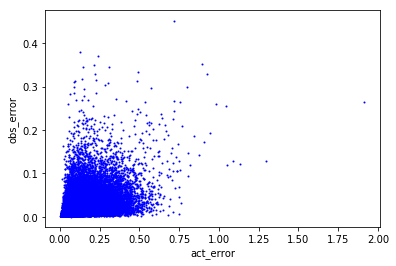

In [2316]:
phase = 'train'
plt.scatter(act_error_list[phase], obs_error_list[phase], 
            marker = 'o', color = 'blue', s = 1, label = 'Third')
plt.xlabel('act_error')
plt.ylabel('obs_error')
plt.savefig('imgs/act_error-obs_error['+phase+'].jpg')
plt.show()

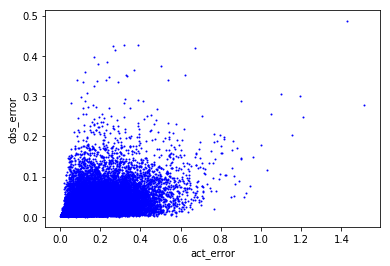

In [2317]:
phase = 'dev'
plt.scatter(act_error_list[phase], obs_error_list[phase], 
            marker = 'o', color = 'blue', s = 1, label = 'Third')
plt.xlabel('act_error')
plt.ylabel('obs_error') 
plt.savefig('imgs/act_error-obs_error['+phase+'].jpg')
plt.show()

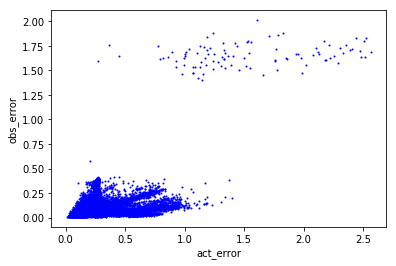

In [2318]:
phase = 'test'
plt.scatter(act_error_list[phase], obs_error_list[phase], 
            marker = 'o', color = 'blue', s = 1, label = 'Third')
plt.xlabel('act_error')
plt.ylabel('obs_error') 
plt.savefig('imgs/act_error-obs_error['+phase+'].jpg')
plt.show()

## Experiment 2: evaluate the error between the learned policy and the expert (BC vs BCO vs SC-BCO)

In [2464]:
class DS_Inv_aug(Dataset):
    def __init__(self, trajs, sigma, aug_ratio, only_aug=False):
        self.dat = []
        mu = 0
        
        for traj in trajs:
            for dat in traj:
                obs, act, new_obs, triple_index = dat
                if not only_aug:
                    self.dat.append(np.array([O_normalizing(obs), O_normalizing(new_obs), 
                                              A_normalizing(act), triple_index]))
                for _ in range(aug_ratio):
                    self.dat.append(np.array([O_normalizing(obs) + np.random.normal(mu, sigma, dX).astype(np.float32), 
                                              O_normalizing(new_obs), A_normalizing(act), np.array([-1, -1])]))
                
    
    def __len__(self):
        return len(self.dat)
    
    def __getitem__(self, idx):
        obs, new_obs, act, triple_index = self.dat[idx]
        
        return obs, new_obs, act, triple_index


### BC

In [2320]:
class DS_Policy(Dataset):
    def __init__(self, traj, norm=False):
        self.dat = []
        if norm:
            for dat in traj:
                obs, act, _ = dat
                self.dat.append([O_normalizing(obs), A_normalizing(act)])
        else:
            for dat in traj:
                obs, act, _ = dat
                self.dat.append([obs, act])
    
    def __len__(self):
        return len(self.dat)
    
    def __getitem__(self, idx):
        obs, act = self.dat[idx]
        
        return obs, act
    

In [2321]:
ld_demo_train_BC = DataLoader(DS_Inv(trajs_demo[0:10]), batch_size=100, shuffle=False)
ld_demo_dev_BC = DataLoader(DS_Inv(trajs_demo[10:20]), batch_size=100, shuffle=False)

In [2322]:
ld_demo_BC = {'train':ld_demo_train_BC, 'dev':ld_demo_dev_BC}

In [2323]:
traj_policy_BC = {'train':[], 'dev':[]}

for phase in ['train', 'dev']:
    for obs1, obs2, action, triple_index in ld_demo_BC[phase]:
        obs = obs1.cpu().detach().numpy()
        act = action.cpu().detach().numpy()
        triple_index = triple_index.cpu().detach().numpy()

        for i in range(len(obs)):
            traj_policy_BC[phase].append([obs[i], act[i], triple_index[i]])


In [2324]:
print(traj_policy_BC['train'][0:5])

[[array([ 5.86431900e+00, -9.05585876e+00, -3.01826134e-01,  2.26589325e-01,
       -8.06245074e-01, -2.22211375e-01, -4.89587978e-02, -9.16634164e-02,
       -2.08996955e+00, -1.61672505e-01,  2.32280342e-03, -1.87374925e-02,
        9.27458995e-03, -2.70580454e-02, -1.50915217e-02,  2.15453684e-02,
        1.15263660e-04]), array([ 0.17475496,  0.3421933 ,  1.0769335 ,  0.12584761,  2.720655  ,
       -1.8464307 ], dtype=float32), array([0, 0])], [array([ 5.64285616, -9.14364736, -0.05249746,  0.31124472,  0.22048949,
       -0.1018104 ,  0.67278857, -1.04635227, -1.55273901, -0.65615573,
       -0.52067574,  0.30448087,  0.16797441,  0.83793219,  0.17932269,
        0.82118271, -0.94407157]), array([ 0.3123897 ,  0.73254615,  0.04834988,  0.77963144,  2.2767596 ,
       -1.8006617 ], dtype=float32), array([0, 1])], [array([ 5.12151586, -9.327651  ,  0.35511856,  0.74467282,  0.25033256,
        0.38406181,  0.9558607 , -2.44232486, -1.32452725, -1.25229409,
       -0.89084545,  0.38

#### step4, update policy via demo samples

In [2325]:
ld_policy_BC = {'train':DataLoader(DS_Policy(traj_policy_BC['train']), batch_size=64, shuffle=True),
                'dev':DataLoader(DS_Policy(traj_policy_BC['dev']), batch_size=64, shuffle=True)}

In [2326]:
ld_policy_sizes_BC = {'train':len(ld_policy_BC['train']), 'dev':len(ld_policy_BC['dev'])}
print(ld_policy_sizes_BC)

{'train': 157, 'dev': 157}


In [2332]:
for data in ld_policy_BC['train']:
    print(len(data))
    print(data[0])
    break

2
tensor([[ 0.1253,  0.2294, -1.5048,  ..., -0.3445, -1.2159, -0.2437],
        [-0.0333,  0.1277,  0.6909,  ...,  0.0828,  0.2440, -1.1319],
        [ 0.1124,  0.0225, -0.5524,  ..., -0.9322, -0.2727, -0.3629],
        ...,
        [ 0.1675,  0.3549, -1.1843,  ..., -0.4569, -0.8607, -0.7126],
        [-0.8097,  0.0646,  1.3575,  ...,  2.5070, -0.3504, -0.9397],
        [ 0.4274,  0.4608, -0.8500,  ..., -0.0637, -0.1948,  1.3345]],
       dtype=torch.float64)


In [2211]:
# w = nn.Linear(20, 64)
# input = T.randn(128, 20)
# output = w(input)
# print(w.weight)
# print(w.bias)

# from a2c_ppo_acktr.utils import init
# from a2c_ppo_acktr.model import Policy

# actor_critic = Policy(env.observation_space.shape, env.action_space)

# recurrent_hidden_states = torch.zeros(1, actor_critic.recurrent_hidden_state_size)
# masks = torch.zeros(1, 1)

In [2333]:
class BC_policy(nn.Module):
    def __init__(self, env, policy='mlp'):
        super(BC_policy, self).__init__()
        
        self.policy = policy
        self.act_n = env.action_space.shape[0]
        
        init_ = lambda m: init(m, nn.init.xavier_normal_, lambda x: nn.init.
                               constant_(x, 0), 0.5)
        
        if self.policy=='mlp':
            self.obs_n = env.observation_space.shape[0]
            
            self.pol = nn.Sequential(*[init_(nn.Linear(self.obs_n, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, self.act_n))])
            
            # self.pol = nn.Sequential(*[(nn.Linear(self.obs_n, self.act_n))])
            '''
            self.pol = nn.Sequential(
                nn.Linear(self.obs_n, 60),
                nn.ReLU(),

                nn.Linear(60,100),
                nn.ReLU(),

                nn.Linear(100,60),
                nn.ReLU(),

                nn.Linear(60,40),
                nn.ReLU(),

                nn.Linear(40,16),
                nn.ReLU(),

                nn.Linear(16, self.act_n),
            )
            '''
        
        elif self.policy=='cnn':
            pass
        
        # self.train()
    
    def pred_act(self, obs):
        out = self.pol(obs)
        
        return out
    

In [2339]:
NN_option = 'mlp'
model_policy_BC = BC_policy(env, policy=NN_option).cuda()

In [2340]:
model_policy_BC

BC_policy(
  (pol): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=6, bias=True)
  )
)

In [2341]:
# loss_func_policy = nn.MSELoss().cuda()
loss_func_policy = nn.L1Loss().cuda()
optim_policy_BC = T.optim.Adam(model_policy_BC.parameters(), lr=1e-3)
# optim_policy_BC = T.optim.SGD(model_policy_BC.parameters(), lr=5e-2)
# optim_policy_BC = T.optim.Adagrad(model_policy_BC.parameters(), lr=1e-3)

In [2421]:
def train_policy_model(model, loss_func, optim, DS, DS_sizes, phase_list, num_epochs=5, 
                       best_criterion='dev'): 
    since = time.time()

    best_model_wts = model.state_dict()
    best_loss = 1000
    best_epoch = 0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in phase_list:
            running_loss = 0.0
            
            # Iterate over data.
            for obs, act in DS[phase]:
                # forward
                out = model.pred_act(obs.float().cuda())
                '''
                if phase == 'train':
                    print('ground act:', act.numpy()[0])
                    print('policy act:', out.cpu().detach().numpy()[0])
                '''
                ls_bh = loss_func(out, act.cuda())
                optim.zero_grad()
                
                # backward + optimize only if in training phase
                if phase == 'train':
                    ls_bh.backward()
                    optim.step()

                ls_bh = ls_bh.cpu().detach().numpy()
                running_loss += ls_bh

            epoch_loss = running_loss / DS_sizes[phase]

            print('{} Loss: {:.4f}'.format(phase, epoch_loss))

            # deep copy the model
            if phase == best_criterion and epoch_loss < best_loss:
                # if epoch_loss < best_loss:
                best_loss = epoch_loss
                best_epoch = epoch
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best epoch: ', best_epoch)
    print('Best dev loss: {:.4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [2343]:
phase_list = ['train', 'dev']
model_policy_BC = train_policy_model(model_policy_BC, loss_func_policy, 
                                     optim_policy_BC, ld_policy_BC, 
                                     ld_policy_sizes_BC, phase_list, 100)

Epoch 0/99
----------
train Loss: 0.3709
dev Loss: 0.1876

Epoch 1/99
----------
train Loss: 0.1657
dev Loss: 0.1447

Epoch 2/99
----------
train Loss: 0.1284
dev Loss: 0.1167

Epoch 3/99
----------
train Loss: 0.1080
dev Loss: 0.1019

Epoch 4/99
----------
train Loss: 0.0949
dev Loss: 0.0897

Epoch 5/99
----------
train Loss: 0.0852
dev Loss: 0.0866

Epoch 6/99
----------
train Loss: 0.0777
dev Loss: 0.0773

Epoch 7/99
----------
train Loss: 0.0722
dev Loss: 0.0719

Epoch 8/99
----------
train Loss: 0.0678
dev Loss: 0.0695

Epoch 9/99
----------
train Loss: 0.0645
dev Loss: 0.0643

Epoch 10/99
----------
train Loss: 0.0627
dev Loss: 0.0651

Epoch 11/99
----------
train Loss: 0.0600
dev Loss: 0.0602

Epoch 12/99
----------
train Loss: 0.0585
dev Loss: 0.0582

Epoch 13/99
----------
train Loss: 0.0566
dev Loss: 0.0588

Epoch 14/99
----------
train Loss: 0.0548
dev Loss: 0.0571

Epoch 15/99
----------
train Loss: 0.0538
dev Loss: 0.0564

Epoch 16/99
----------
train Loss: 0.0528
dev Loss

In [2344]:
optim_policy_BC = T.optim.Adam(model_policy_BC.parameters(), lr=1e-4)
model_policy_BC = train_policy_model(model_policy_BC, loss_func_policy, 
                                     optim_policy_BC, ld_policy_BC, 
                                     ld_policy_sizes_BC, phase_list, 100)

Epoch 0/99
----------
train Loss: 0.0268
dev Loss: 0.0299

Epoch 1/99
----------
train Loss: 0.0265
dev Loss: 0.0299

Epoch 2/99
----------
train Loss: 0.0265
dev Loss: 0.0298

Epoch 3/99
----------
train Loss: 0.0264
dev Loss: 0.0297

Epoch 4/99
----------
train Loss: 0.0266
dev Loss: 0.0299

Epoch 5/99
----------
train Loss: 0.0264
dev Loss: 0.0296

Epoch 6/99
----------
train Loss: 0.0264
dev Loss: 0.0299

Epoch 7/99
----------
train Loss: 0.0263
dev Loss: 0.0299

Epoch 8/99
----------
train Loss: 0.0263
dev Loss: 0.0296

Epoch 9/99
----------
train Loss: 0.0264
dev Loss: 0.0296

Epoch 10/99
----------
train Loss: 0.0263
dev Loss: 0.0296

Epoch 11/99
----------
train Loss: 0.0262
dev Loss: 0.0297

Epoch 12/99
----------
train Loss: 0.0262
dev Loss: 0.0297

Epoch 13/99
----------
train Loss: 0.0262
dev Loss: 0.0295

Epoch 14/99
----------
train Loss: 0.0261
dev Loss: 0.0296

Epoch 15/99
----------
train Loss: 0.0262
dev Loss: 0.0295

Epoch 16/99
----------
train Loss: 0.0262
dev Loss

### BCO

#### step3, predict inverse action for demo samples

In [2371]:
ld_demo_train = DataLoader(DS_Inv(trajs_demo[0:10]), batch_size=100)
ld_demo_dev = DataLoader(DS_Inv(trajs_demo[10:20]), batch_size=100)

In [2377]:
ld_demo = {'train':ld_demo_train, 'dev':ld_demo_dev}

In [2378]:
traj_policy = {'train':[] , 'dev':[]}

for phase in ['train', 'dev']:
    for obs1, obs2, _, triple_index in ld_demo[phase]:
        out = model_inv.pred_inv(obs1.float().cuda(), obs2.float().cuda())

        obs = obs1.cpu().detach().numpy()
        out = out.cpu().detach().numpy()
        triple_index = triple_index.cpu().detach().numpy()

        for i in range(len(obs)):
            traj_policy[phase].append([obs[i], out[i], triple_index[i]])


In [2379]:
print(traj_policy['train'][0:10])

[[array([ 5.86431900e+00, -9.05585876e+00, -3.01826134e-01,  2.26589325e-01,
       -8.06245074e-01, -2.22211375e-01, -4.89587978e-02, -9.16634164e-02,
       -2.08996955e+00, -1.61672505e-01,  2.32280342e-03, -1.87374925e-02,
        9.27458995e-03, -2.70580454e-02, -1.50915217e-02,  2.15453684e-02,
        1.15263660e-04]), array([ 0.20347701,  0.34384775,  1.1193811 ,  0.17079173,  2.0208821 ,
       -1.8462422 ], dtype=float32), array([0, 0])], [array([ 5.64285616, -9.14364736, -0.05249746,  0.31124472,  0.22048949,
       -0.1018104 ,  0.67278857, -1.04635227, -1.55273901, -0.65615573,
       -0.52067574,  0.30448087,  0.16797441,  0.83793219,  0.17932269,
        0.82118271, -0.94407157]), array([ 0.3537506 ,  0.80692464, -0.04507238,  0.7677301 ,  1.9528911 ,
       -2.1713479 ], dtype=float32), array([0, 1])], [array([ 5.12151586, -9.327651  ,  0.35511856,  0.74467282,  0.25033256,
        0.38406181,  0.9558607 , -2.44232486, -1.32452725, -1.25229409,
       -0.89084545,  0.38

#### step4, update policy via demo samples

In [2380]:
ld_policy = {'train':DataLoader(DS_Policy(traj_policy['train']), batch_size=64, shuffle=True),
             'dev':DataLoader(DS_Policy(traj_policy['dev']), batch_size=64, shuffle=True)}

In [2381]:
ld_policy_sizes = {'train':len(ld_policy['train']),'dev':len(ld_policy['dev'])}
print(ld_policy_sizes)

{'train': 157, 'dev': 157}


In [2382]:
class BCO_policy(nn.Module):
    def __init__(self, env, policy='mlp'):
        super(BCO_policy, self).__init__()
        
        self.policy = policy
        self.act_n = env.action_space.shape[0]
        
        init_ = lambda m: init(m, nn.init.xavier_normal_, lambda x: nn.init.
                               constant_(x, 0), 0.5)
        
        if self.policy=='mlp':
            self.obs_n = env.observation_space.shape[0]
            self.pol = nn.Sequential(*[init_(nn.Linear(self.obs_n, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, self.act_n))])
        
        elif self.policy=='cnn':
            pass
    
    def pred_act(self, obs):
        out = self.pol(obs)
        
        return out
    

In [2383]:
NN_option = 'mlp'
model_policy = BCO_policy(env, policy=NN_option).cuda()

In [2384]:
model_policy

BCO_policy(
  (pol): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=6, bias=True)
  )
)

In [2385]:
loss_func_policy = nn.L1Loss().cuda()
optim_policy = T.optim.Adam(model_policy.parameters(), lr=1e-3)
# optim_policy = T.optim.SGD(model_policy.parameters(), lr=5e-2)

In [2386]:
phase_list = ['train', 'dev']
model_policy = train_policy_model(model_policy, loss_func_policy, 
                                  optim_policy, ld_policy, ld_policy_sizes, phase_list, 100)

Epoch 0/99
----------
train Loss: 0.3802
dev Loss: 0.2008

Epoch 1/99
----------
train Loss: 0.1814
dev Loss: 0.1650

Epoch 2/99
----------
train Loss: 0.1538
dev Loss: 0.1445

Epoch 3/99
----------
train Loss: 0.1362
dev Loss: 0.1303

Epoch 4/99
----------
train Loss: 0.1238
dev Loss: 0.1195

Epoch 5/99
----------
train Loss: 0.1144
dev Loss: 0.1108

Epoch 6/99
----------
train Loss: 0.1075
dev Loss: 0.1052

Epoch 7/99
----------
train Loss: 0.1024
dev Loss: 0.1016

Epoch 8/99
----------
train Loss: 0.0983
dev Loss: 0.0985

Epoch 9/99
----------
train Loss: 0.0954
dev Loss: 0.0950

Epoch 10/99
----------
train Loss: 0.0936
dev Loss: 0.0948

Epoch 11/99
----------
train Loss: 0.0910
dev Loss: 0.0938

Epoch 12/99
----------
train Loss: 0.0897
dev Loss: 0.0912

Epoch 13/99
----------
train Loss: 0.0879
dev Loss: 0.0891

Epoch 14/99
----------
train Loss: 0.0856
dev Loss: 0.0867

Epoch 15/99
----------
train Loss: 0.0845
dev Loss: 0.0848

Epoch 16/99
----------
train Loss: 0.0834
dev Loss

In [2388]:
optim_policy = T.optim.Adam(model_policy.parameters(), lr=1e-4)
model_policy = train_policy_model(model_policy, loss_func_policy, 
                                  optim_policy, ld_policy, ld_policy_sizes, phase_list, 100)

Epoch 0/99
----------
train Loss: 0.0553
dev Loss: 0.0587

Epoch 1/99
----------
train Loss: 0.0552
dev Loss: 0.0587

Epoch 2/99
----------
train Loss: 0.0551
dev Loss: 0.0587

Epoch 3/99
----------
train Loss: 0.0552
dev Loss: 0.0586

Epoch 4/99
----------
train Loss: 0.0550
dev Loss: 0.0587

Epoch 5/99
----------
train Loss: 0.0551
dev Loss: 0.0585

Epoch 6/99
----------
train Loss: 0.0549
dev Loss: 0.0586

Epoch 7/99
----------
train Loss: 0.0549
dev Loss: 0.0586

Epoch 8/99
----------
train Loss: 0.0549
dev Loss: 0.0586

Epoch 9/99
----------
train Loss: 0.0548
dev Loss: 0.0589

Epoch 10/99
----------
train Loss: 0.0549
dev Loss: 0.0584

Epoch 11/99
----------
train Loss: 0.0549
dev Loss: 0.0588

Epoch 12/99
----------
train Loss: 0.0548
dev Loss: 0.0585

Epoch 13/99
----------
train Loss: 0.0548
dev Loss: 0.0585

Epoch 14/99
----------
train Loss: 0.0548
dev Loss: 0.0584

Epoch 15/99
----------
train Loss: 0.0548
dev Loss: 0.0587

Epoch 16/99
----------
train Loss: 0.0548
dev Loss

#### SC-BCO

In [2404]:
noise_sigma = 0.1
aug_ratio = 4
noise_sigma_dev = 0.1
aug_ratio_dev = 5
# print(np.random.normal(0, noise_sigma, dX).astype(np.float32).dtype)

demo_DS_Inv_aug_train = DS_Inv_aug(trajs_demo[0:10], noise_sigma, aug_ratio)
demo_DS_Inv_aug_dev_local = DS_Inv_aug(trajs_demo[0:10], noise_sigma_dev, aug_ratio_dev, True)
demo_DS_Inv_aug_dev_global = DS_Inv_aug(trajs_demo[10:20], noise_sigma, aug_ratio)

ld_demo_aug_train = DataLoader(demo_DS_Inv_aug_train, batch_size=100)
ld_demo_aug_dev_local = DataLoader(demo_DS_Inv_aug_dev_local, batch_size=100)
ld_demo_aug_dev_global = DataLoader(demo_DS_Inv_aug_dev_global, batch_size=100)

In [2405]:
ld_demo_aug = {'train':ld_demo_aug_train, 'dev_local':ld_demo_aug_dev_local,
               'dev_global':ld_demo_aug_dev_global}

In [2411]:
traj_policy_aug = {'train':[] , 'dev_local':[], 'dev_global':[]}

for phase in ['train', 'dev_local', 'dev_global']:
    for obs1, obs2, _, triple_index in ld_demo_aug[phase]:
        out = model_inv.pred_inv(obs1.float().cuda(), obs2.float().cuda())

        obs = obs1.cpu().detach().numpy()
        out = out.cpu().detach().numpy()
        triple_index = triple_index.cpu().detach().numpy()

        for i in range(len(obs)):
            traj_policy_aug[phase].append([obs[i], out[i], triple_index[i]])


In [2412]:
ld_policy_aug = {'train':DataLoader(DS_Policy(traj_policy_aug['train']), batch_size=128, shuffle=True),
                 'dev_local':DataLoader(DS_Policy(traj_policy_aug['dev_local']), batch_size=128, shuffle=True),
                 'dev_global':DataLoader(DS_Policy(traj_policy_aug['dev_global']), batch_size=128, shuffle=True)}

In [2413]:
ld_policy_aug_sizes = {'train':len(ld_policy_aug['train']),
                       'dev_local':len(ld_policy_aug['dev_local']),
                       'dev_global':len(ld_policy_aug['dev_global']),}
print(ld_policy_aug_sizes)

{'train': 391, 'dev_local': 391, 'dev_global': 391}


In [2450]:
class BCO_policy_aug(nn.Module):
    def __init__(self, env, policy='mlp'):
        super(BCO_policy_aug, self).__init__()
        
        self.policy = policy
        self.act_n = env.action_space.shape[0]
        
        init_ = lambda m: init(m, nn.init.xavier_normal_, lambda x: nn.init.
                               constant_(x, 0), 0.5)
        
        if self.policy=='mlp':
            self.obs_n = env.observation_space.shape[0]
            self.pol = nn.Sequential(*[init_(nn.Linear(self.obs_n, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, self.act_n))])
        
        elif self.policy=='cnn':
            pass
    
    def pred_act(self, obs):
        out = self.pol(obs)
        
        return out
    

In [2451]:
model_policy_aug = BCO_policy_aug(env, policy=NN_option).cuda()

In [2452]:
model_policy_aug

BCO_policy_aug(
  (pol): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=6, bias=True)
  )
)

In [2453]:
optim_policy_aug = T.optim.Adam(model_policy_aug.parameters(), lr=1e-3)

In [2454]:
phase_list = ['train', 'dev_local', 'dev_global']
model_policy_aug = train_policy_model(model_policy_aug, loss_func_policy, 
                                      optim_policy_aug, ld_policy_aug, 
                                      ld_policy_aug_sizes, phase_list, 100, 
                                      best_criterion='dev_global')

Epoch 0/99
----------
train Loss: 0.2811
dev_local Loss: 0.1899
dev_global Loss: 0.1803

Epoch 1/99
----------
train Loss: 0.1654
dev_local Loss: 0.1629
dev_global Loss: 0.1534

Epoch 2/99
----------
train Loss: 0.1475
dev_local Loss: 0.1519
dev_global Loss: 0.1427

Epoch 3/99
----------
train Loss: 0.1389
dev_local Loss: 0.1453
dev_global Loss: 0.1367

Epoch 4/99
----------
train Loss: 0.1330
dev_local Loss: 0.1404
dev_global Loss: 0.1321

Epoch 5/99
----------
train Loss: 0.1296
dev_local Loss: 0.1362
dev_global Loss: 0.1279

Epoch 6/99
----------
train Loss: 0.1266
dev_local Loss: 0.1335
dev_global Loss: 0.1255

Epoch 7/99
----------
train Loss: 0.1243
dev_local Loss: 0.1325
dev_global Loss: 0.1248

Epoch 8/99
----------
train Loss: 0.1225
dev_local Loss: 0.1295
dev_global Loss: 0.1219

Epoch 9/99
----------
train Loss: 0.1210
dev_local Loss: 0.1303
dev_global Loss: 0.1232

Epoch 10/99
----------
train Loss: 0.1197
dev_local Loss: 0.1280
dev_global Loss: 0.1208

Epoch 11/99
--------

train Loss: 0.1004
dev_local Loss: 0.1090
dev_global Loss: 0.1040

Epoch 92/99
----------
train Loss: 0.1004
dev_local Loss: 0.1088
dev_global Loss: 0.1039

Epoch 93/99
----------
train Loss: 0.1003
dev_local Loss: 0.1090
dev_global Loss: 0.1042

Epoch 94/99
----------
train Loss: 0.1001
dev_local Loss: 0.1084
dev_global Loss: 0.1035

Epoch 95/99
----------
train Loss: 0.1000
dev_local Loss: 0.1083
dev_global Loss: 0.1034

Epoch 96/99
----------
train Loss: 0.0999
dev_local Loss: 0.1085
dev_global Loss: 0.1040

Epoch 97/99
----------
train Loss: 0.1000
dev_local Loss: 0.1079
dev_global Loss: 0.1034

Epoch 98/99
----------
train Loss: 0.1000
dev_local Loss: 0.1084
dev_global Loss: 0.1035

Epoch 99/99
----------
train Loss: 0.0998
dev_local Loss: 0.1080
dev_global Loss: 0.1035

Training complete in 4m 37s
Best epoch:  90
Best dev loss: 0.1028


In [2455]:
optim_policy_aug = T.optim.Adam(model_policy_aug.parameters(), lr=1e-4)
model_policy_aug = train_policy_model(model_policy_aug, loss_func_policy, 
                                      optim_policy_aug, ld_policy_aug, 
                                      ld_policy_aug_sizes, phase_list, 100, 
                                      best_criterion='dev_global')

Epoch 0/99
----------
train Loss: 0.0961
dev_local Loss: 0.1053
dev_global Loss: 0.1002

Epoch 1/99
----------
train Loss: 0.0958
dev_local Loss: 0.1055
dev_global Loss: 0.1004

Epoch 2/99
----------
train Loss: 0.0958
dev_local Loss: 0.1054
dev_global Loss: 0.1003

Epoch 3/99
----------
train Loss: 0.0957
dev_local Loss: 0.1053
dev_global Loss: 0.1002

Epoch 4/99
----------
train Loss: 0.0957
dev_local Loss: 0.1054
dev_global Loss: 0.1002

Epoch 5/99
----------
train Loss: 0.0957
dev_local Loss: 0.1054
dev_global Loss: 0.1002

Epoch 6/99
----------
train Loss: 0.0957
dev_local Loss: 0.1053
dev_global Loss: 0.1001

Epoch 7/99
----------
train Loss: 0.0957
dev_local Loss: 0.1052
dev_global Loss: 0.1001

Epoch 8/99
----------
train Loss: 0.0956
dev_local Loss: 0.1055
dev_global Loss: 0.1003

Epoch 9/99
----------
train Loss: 0.0956
dev_local Loss: 0.1053
dev_global Loss: 0.1001

Epoch 10/99
----------
train Loss: 0.0956
dev_local Loss: 0.1053
dev_global Loss: 0.1002

Epoch 11/99
--------

train Loss: 0.0947
dev_local Loss: 0.1046
dev_global Loss: 0.0997

Epoch 92/99
----------
train Loss: 0.0948
dev_local Loss: 0.1046
dev_global Loss: 0.0995

Epoch 93/99
----------
train Loss: 0.0947
dev_local Loss: 0.1045
dev_global Loss: 0.0995

Epoch 94/99
----------
train Loss: 0.0947
dev_local Loss: 0.1044
dev_global Loss: 0.0994

Epoch 95/99
----------
train Loss: 0.0947
dev_local Loss: 0.1045
dev_global Loss: 0.0997

Epoch 96/99
----------
train Loss: 0.0947
dev_local Loss: 0.1047
dev_global Loss: 0.0997

Epoch 97/99
----------
train Loss: 0.0947
dev_local Loss: 0.1045
dev_global Loss: 0.0995

Epoch 98/99
----------
train Loss: 0.0947
dev_local Loss: 0.1045
dev_global Loss: 0.0997

Epoch 99/99
----------
train Loss: 0.0947
dev_local Loss: 0.1046
dev_global Loss: 0.0997

Training complete in 4m 46s
Best epoch:  94
Best dev loss: 0.0994


#### SC-BC

In [2465]:
noise_sigma = 0.1
aug_ratio = 4
noise_sigma_dev = 0.1
aug_ratio_dev = 5
# print(np.random.normal(0, noise_sigma, dX).astype(np.float32).dtype)

demo_DS_Inv_aug_train = DS_Inv_aug(trajs_demo[0:10], noise_sigma, aug_ratio)
demo_DS_Inv_aug_dev_local = DS_Inv_aug(trajs_demo[0:10], noise_sigma_dev, aug_ratio_dev, True)
demo_DS_Inv_aug_dev_global = DS_Inv_aug(trajs_demo[10:20], noise_sigma, aug_ratio)

ld_demo_aug_train = DataLoader(demo_DS_Inv_aug_train, batch_size=100)
ld_demo_aug_dev_local = DataLoader(demo_DS_Inv_aug_dev_local, batch_size=100)
ld_demo_aug_dev_global = DataLoader(demo_DS_Inv_aug_dev_global, batch_size=100)

In [2466]:
ld_demo_aug = {'train':ld_demo_aug_train, 'dev_local':ld_demo_aug_dev_local,
               'dev_global':ld_demo_aug_dev_global}

In [2467]:
traj_policy_aug_BC = {'train':[] , 'dev_local':[], 'dev_global':[]}

for phase in ['train', 'dev_local', 'dev_global']:
    for obs1, obs2, act, triple_index in ld_demo_aug[phase]:
        out = model_inv.pred_inv(obs1.float().cuda(), obs2.float().cuda())

        obs = obs1.cpu().detach().numpy()
        out = out.cpu().detach().numpy()  
        triple_index = triple_index.cpu().detach().numpy()
        act = act.cpu().detach().numpy()  

        for i in range(len(obs)):
            if triple_index[i][0] < 0:
                action = out[i]
            else:
                action = act[i]
            traj_policy_aug_BC[phase].append([obs[i], action, triple_index[i]])


In [2468]:
ld_policy_aug_BC = {'train':DataLoader(DS_Policy(traj_policy_aug_BC['train']), batch_size=128, shuffle=True),
                    'dev_local':DataLoader(DS_Policy(traj_policy_aug_BC['dev_local']), batch_size=128, shuffle=True),
                    'dev_global':DataLoader(DS_Policy(traj_policy_aug_BC['dev_global']), batch_size=128, shuffle=True)}

In [2469]:
ld_policy_aug_sizes_BC = {'train':len(ld_policy_aug_BC['train']),
                          'dev_local':len(ld_policy_aug_BC['dev_local']),
                          'dev_global':len(ld_policy_aug_BC['dev_global']),}
print(ld_policy_aug_sizes_BC)

{'train': 391, 'dev_local': 391, 'dev_global': 391}


In [2470]:
class BCO_policy_aug_BC(nn.Module):
    def __init__(self, env, policy='mlp'):
        super(BCO_policy_aug_BC, self).__init__()
        
        self.policy = policy
        self.act_n = env.action_space.shape[0]
        
        init_ = lambda m: init(m, nn.init.xavier_normal_, lambda x: nn.init.
                               constant_(x, 0), 0.5)
        
        if self.policy=='mlp':
            self.obs_n = env.observation_space.shape[0]
            self.pol = nn.Sequential(*[init_(nn.Linear(self.obs_n, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, 64)), nn.LeakyReLU(),
                                       init_(nn.Linear(64, self.act_n))])
        
        elif self.policy=='cnn':
            pass
    
    def pred_act(self, obs):
        out = self.pol(obs)
        
        return out
    

In [2471]:
model_policy_aug_BC = BCO_policy_aug_BC(env, policy=NN_option).cuda()

In [2472]:
model_policy_aug_BC

BCO_policy_aug_BC(
  (pol): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=6, bias=True)
  )
)

In [2474]:
optim_policy_aug_BC = T.optim.Adam(model_policy_aug_BC.parameters(), lr=1e-3)

In [2475]:
phase_list = ['train', 'dev_local', 'dev_global']
model_policy_aug_BC = train_policy_model(model_policy_aug_BC, loss_func_policy, 
                                         optim_policy_aug_BC, ld_policy_aug_BC, 
                                         ld_policy_aug_sizes_BC, phase_list, 100, 
                                         best_criterion='dev_global')

Epoch 0/99
----------
train Loss: 0.2906
dev_local Loss: 0.1951
dev_global Loss: 0.1976

Epoch 1/99
----------
train Loss: 0.1836
dev_local Loss: 0.1688
dev_global Loss: 0.1750

Epoch 2/99
----------
train Loss: 0.1679
dev_local Loss: 0.1582
dev_global Loss: 0.1647

Epoch 3/99
----------
train Loss: 0.1598
dev_local Loss: 0.1494
dev_global Loss: 0.1576

Epoch 4/99
----------
train Loss: 0.1553
dev_local Loss: 0.1486
dev_global Loss: 0.1565

Epoch 5/99
----------
train Loss: 0.1524
dev_local Loss: 0.1457
dev_global Loss: 0.1537

Epoch 6/99
----------
train Loss: 0.1496
dev_local Loss: 0.1408
dev_global Loss: 0.1499

Epoch 7/99
----------
train Loss: 0.1475
dev_local Loss: 0.1376
dev_global Loss: 0.1481

Epoch 8/99
----------
train Loss: 0.1460
dev_local Loss: 0.1391
dev_global Loss: 0.1479

Epoch 9/99
----------
train Loss: 0.1446
dev_local Loss: 0.1330
dev_global Loss: 0.1462

Epoch 10/99
----------
train Loss: 0.1432
dev_local Loss: 0.1338
dev_global Loss: 0.1439

Epoch 11/99
--------

train Loss: 0.1239
dev_local Loss: 0.1139
dev_global Loss: 0.1279

Epoch 92/99
----------
train Loss: 0.1240
dev_local Loss: 0.1171
dev_global Loss: 0.1294

Epoch 93/99
----------
train Loss: 0.1244
dev_local Loss: 0.1137
dev_global Loss: 0.1289

Epoch 94/99
----------
train Loss: 0.1239
dev_local Loss: 0.1143
dev_global Loss: 0.1285

Epoch 95/99
----------
train Loss: 0.1240
dev_local Loss: 0.1141
dev_global Loss: 0.1269

Epoch 96/99
----------
train Loss: 0.1239
dev_local Loss: 0.1129
dev_global Loss: 0.1272

Epoch 97/99
----------
train Loss: 0.1236
dev_local Loss: 0.1151
dev_global Loss: 0.1282

Epoch 98/99
----------
train Loss: 0.1239
dev_local Loss: 0.1119
dev_global Loss: 0.1274

Epoch 99/99
----------
train Loss: 0.1237
dev_local Loss: 0.1124
dev_global Loss: 0.1268

Training complete in 4m 54s
Best epoch:  90
Best dev loss: 0.1268


In [2476]:
optim_policy_aug_BC = T.optim.Adam(model_policy_aug_BC.parameters(), lr=1e-4)
model_policy_aug_BC = train_policy_model(model_policy_aug_BC, loss_func_policy, 
                                         optim_policy_aug_BC, ld_policy_aug_BC, 
                                         ld_policy_aug_sizes_BC, phase_list, 100, 
                                         best_criterion='dev_global')

Epoch 0/99
----------
train Loss: 0.1199
dev_local Loss: 0.1094
dev_global Loss: 0.1240

Epoch 1/99
----------
train Loss: 0.1196
dev_local Loss: 0.1095
dev_global Loss: 0.1239

Epoch 2/99
----------
train Loss: 0.1196
dev_local Loss: 0.1096
dev_global Loss: 0.1240

Epoch 3/99
----------
train Loss: 0.1196
dev_local Loss: 0.1096
dev_global Loss: 0.1240

Epoch 4/99
----------
train Loss: 0.1195
dev_local Loss: 0.1096
dev_global Loss: 0.1240

Epoch 5/99
----------
train Loss: 0.1195
dev_local Loss: 0.1087
dev_global Loss: 0.1239

Epoch 6/99
----------
train Loss: 0.1195
dev_local Loss: 0.1093
dev_global Loss: 0.1239

Epoch 7/99
----------
train Loss: 0.1195
dev_local Loss: 0.1097
dev_global Loss: 0.1241

Epoch 8/99
----------
train Loss: 0.1195
dev_local Loss: 0.1094
dev_global Loss: 0.1239

Epoch 9/99
----------
train Loss: 0.1194
dev_local Loss: 0.1093
dev_global Loss: 0.1240

Epoch 10/99
----------
train Loss: 0.1194
dev_local Loss: 0.1093
dev_global Loss: 0.1237

Epoch 11/99
--------

train Loss: 0.1186
dev_local Loss: 0.1088
dev_global Loss: 0.1233

Epoch 92/99
----------
train Loss: 0.1186
dev_local Loss: 0.1085
dev_global Loss: 0.1232

Epoch 93/99
----------
train Loss: 0.1186
dev_local Loss: 0.1090
dev_global Loss: 0.1234

Epoch 94/99
----------
train Loss: 0.1185
dev_local Loss: 0.1088
dev_global Loss: 0.1238

Epoch 95/99
----------
train Loss: 0.1185
dev_local Loss: 0.1090
dev_global Loss: 0.1232

Epoch 96/99
----------
train Loss: 0.1186
dev_local Loss: 0.1085
dev_global Loss: 0.1234

Epoch 97/99
----------
train Loss: 0.1185
dev_local Loss: 0.1088
dev_global Loss: 0.1232

Epoch 98/99
----------
train Loss: 0.1186
dev_local Loss: 0.1088
dev_global Loss: 0.1233

Epoch 99/99
----------
train Loss: 0.1185
dev_local Loss: 0.1086
dev_global Loss: 0.1233

Training complete in 4m 57s
Best epoch:  97
Best dev loss: 0.1232


### Average error variation along demo trajectories (BC vs BCO vs SC-BCO)

In [2359]:
def get_mimic_trajs(model, model_name, traj_num=10, horizon=1000, start_step=0, random_init=False):
    trajs_mimic = []
    st_info = []
    rew_info = []
    cnt = 0
    epn = traj_num
    rews = 0.0

    for traj_index in range(epn):
        traj = []
        traj_st = []
        traj_rew = []
        rew = 0.0

        if random_init:
            obs = env.reset()
            st = env.sim.get_state()
            traj_st.append(st)
        else:
            st = demo_st_info[traj_index][start_step]
            # print(st)
            env.sim.set_state(st)
            obs = trajs_demo[traj_index][start_step][0]
            traj_st.append(st)
            
        for step in range(horizon):
            obs_norm = O_normalizing(obs)
            act_norm = model.pred_act(T.Tensor([obs_norm]).cuda())

            act_norm = act_norm.cpu().detach().numpy()[0]
            # print(act_norm)
            act = A_recovering(act_norm)
            # print(act)
            
            new_obs, r, done, _ = env.step(act)

            traj.append([obs, act, new_obs])
            traj_rew.append(r)
            # print(r)

            obs = new_obs
            rew += r
            cnt += 1
            st = env.sim.get_state()
            traj_st.append(st)
            # print(done)

        # print(rew)
        rews += rew
        trajs_mimic.append(traj)
        st_info.append(traj_st)
        rew_info.append(traj_rew)

    rews /= epn
    print(len(trajs_mimic), len(trajs_mimic[0]))
    print('average reward of {} {} trajs: {:.2f}'.format(epn, model_name, rews))
    
    return trajs_mimic, st_info, rew_info


#### Expert

In [2350]:
rews_list = np.sum(demo_rew_info[0:10], axis=1)
print(rews_list)

[1775.5519 1759.2698 1814.5062 1800.4143 1821.2463 1799.949  1822.4805
 1800.2778 1778.0415 1794.0184]


In [2349]:
expert_rews = np.sum(demo_rew_info[0:10])
print('average reward of {} {} trajs: {:.2f}'.format(10, 'expert', expert_rews / 10))

average reward of 10 expert trajs: 1796.58


#### BC

In [2368]:
trajs_BC, BC_st_info, BC_rew_info = get_mimic_trajs(model_policy_BC, 'BC')

10 1000
average reward of 10 BC trajs: 1784.78


In [2361]:
print(trajs_demo[0][0][0])
print(trajs_BC[0][0][0])
print(trajs_demo[0][0][1])
print(trajs_BC[0][0][1])
print(A_normalizing(trajs_demo[0][0][1]))
print(A_normalizing(trajs_BC[0][0][1]))
print(trajs_demo[0][0][2])
print(trajs_BC[0][0][2])
print(BC_st_info[0][0])
print(BC_rew_info[0][900:950])

[-0.05514779  0.01413077  0.05431647 -0.07718844 -0.00049597 -0.09359713
  0.0420625   0.0338486  -0.04637919 -0.07595596  0.0203414   0.03111221
  0.09077952 -0.21187306  0.09768369  0.06454459 -0.02387658]
[-0.05514779  0.01413077  0.05431647 -0.07718844 -0.00049597 -0.09359713
  0.0420625   0.0338486  -0.04637919 -0.07595596  0.0203414   0.03111221
  0.09077952 -0.21187306  0.09768369  0.06454459 -0.02387658]
[ 4.6757808e-01  1.4283210e-03  6.5947473e-01  1.8217321e-01
  1.4451610e+00 -5.1731670e-01]
[ 0.42033994  0.02886429  0.6486292   0.16582847  1.4224373  -0.49327943]
[ 0.17475496  0.3421933   1.0769335   0.12584761  2.720655   -1.8464307 ]
[ 0.09094691  0.373872    1.0461167   0.10510217  2.6799183  -1.7665071 ]
[-0.07202693 -0.01772098  0.15221099 -0.03565283  0.23121198 -0.01841621
  0.33170059 -0.1662426   0.49294502 -0.50951452 -0.75886748  2.57497647
  1.62760945  5.13046556  2.27734184  7.41693052 -5.22591411]
[-0.07302701 -0.01909278  0.13912533 -0.02592187  0.23464571 

In [2367]:
trajs_BC_r, BC_st_info_r, BC_rew_info_r = get_mimic_trajs(model_policy_BC, 'BC', random_init=True)

10 1000
average reward of 10 BC trajs: 1788.89


#### BCO

In [2389]:
trajs_BCO, BCO_st_info, BCO_rew_info = get_mimic_trajs(model_policy, 'BCO')

10 1000
average reward of 10 BCO trajs: 1502.79


In [2390]:
trajs_BCO_r, BCO_st_info_r, BCO_rew_info_r = get_mimic_trajs(model_policy, 'BCO', random_init=True)

10 1000
average reward of 10 BCO trajs: 1508.25


#### SC-BCO

In [2456]:
trajs_SCBCO, SCBCO_st_info, SCBCO_rew_info = get_mimic_trajs(model_policy_aug, 'SC-BCO')

10 1000
average reward of 10 SC-BCO trajs: 1494.63


In [2457]:
trajs_SCBCO_r, SCBCO_st_info_r, SCBCO_rew_info_r = get_mimic_trajs(model_policy_aug, 'SC-BCO',
                                                                   random_init=True)

10 1000
average reward of 10 SC-BCO trajs: 1502.10


#### SC-BC

In [2477]:
trajs_SCBC, SCBC_st_info, SCBC_rew_info = get_mimic_trajs(model_policy_aug_BC, 'SC-BC')

10 1000
average reward of 10 SC-BC trajs: 1511.55


In [2478]:
trajs_SCBC_r, SCBC_st_info_r, SCBC_rew_info_r = get_mimic_trajs(model_policy_aug_BC, 'SC-BC',
                                                                random_init=True)

10 1000
average reward of 10 SC-BC trajs: 1520.58


#### error-time_step graph

In [2365]:
def get_error_seq(trajs_mimic, traj_num=10, horizon=1000):
    error_trajs = []
    for t in range(traj_num):
        error_traj = []
        for s in range(horizon):
            error_traj.append(np.mean(np.fabs(O_normalizing(trajs_demo[t][s][0])
                                             - O_normalizing(trajs_mimic[t][s][0]))))
        error_trajs.append(error_traj)
    return np.mean(error_trajs, axis=0)

In [1090]:
np.linalg.norm([1,1,1,1,1])

2.23606797749979

#### BC

In [2369]:
BC_error_seq = get_error_seq(trajs_BC)
print(BC_error_seq)

[0.         0.03709429 0.06066196 0.0661917  0.07986158 0.09171651
 0.10687396 0.10951049 0.12491487 0.1386254  0.17556303 0.1479805
 0.16397097 0.16302392 0.18410762 0.1885767  0.19223864 0.19893697
 0.23363699 0.28842538 0.36925132 0.45389676 0.5374315  0.54692789
 0.54251717 0.52005354 0.49146955 0.53328538 0.60725863 0.67209322
 0.77528877 0.76554828 0.76220382 0.6945462  0.6313261  0.61021354
 0.61808325 0.71116527 0.80454982 0.90790527 0.74632317 0.65894932
 0.56071076 0.55615193 0.65297805 0.68701146 0.82554504 0.79929748
 0.7106361  0.57492339 0.49869279 0.53479559 0.57506404 0.68211924
 0.80459807 0.84319659 0.74038203 0.68990208 0.54941857 0.53103932
 0.64938996 0.74687221 0.83448913 0.81108926 0.710002   0.59868549
 0.54075962 0.5541457  0.65948345 0.72730599 0.85126388 0.88328108
 0.71646403 0.61429286 0.57581142 0.57467808 0.66456999 0.71451617
 0.82816436 0.85048298 0.71756291 0.64159659 0.5762558  0.58656519
 0.62911628 0.73627928 0.85611397 0.89270981 0.74528871 0.69491

#### BCO

In [2391]:
BCO_error_seq = get_error_seq(trajs_BCO)
print(BCO_error_seq)

[0.         0.04208672 0.07048247 0.09530356 0.12468443 0.19442156
 0.20752649 0.24224397 0.25574469 0.27961868 0.33825758 0.35389042
 0.34307171 0.31243333 0.32518412 0.28912608 0.28651197 0.28801419
 0.3271352  0.39468921 0.51672314 0.62487591 0.72410458 0.95021456
 0.89159407 0.85035115 0.81462773 0.77829017 0.81843841 0.87243643
 0.90768794 1.0157635  1.07689269 0.96680297 0.90267691 0.88853044
 0.82016577 0.85563268 0.94843198 1.08912879 1.12949157 0.94214998
 0.92833416 0.88244647 0.85522272 0.90822037 0.98522057 1.04582707
 1.10405766 0.95709263 0.90367854 0.84071972 0.81657622 0.91067915
 0.97012788 1.11206033 1.03868137 1.0129302  0.91220759 0.87759866
 0.88659637 0.92213872 0.97703651 1.06367256 0.95413063 0.95026432
 0.91383788 0.81213304 0.85283307 0.86139299 0.93896208 0.98507154
 0.90670221 0.92563604 0.91021584 0.81393488 0.78203013 0.85068335
 0.95057691 1.00572034 0.8902554  0.8785812  0.80139862 0.76408122
 0.74897541 0.84437006 0.94542646 1.00177864 0.92677133 0.9067

#### SC-BCO

In [2458]:
SCBCO_error_seq = get_error_seq(trajs_SCBCO)
print(SCBCO_error_seq)

[0.         0.04138397 0.07204708 0.07124966 0.06772004 0.10214348
 0.11907995 0.1403129  0.18199039 0.22654778 0.28306955 0.30295882
 0.27721352 0.26136631 0.25233694 0.21769896 0.21651477 0.22696915
 0.2650398  0.33147212 0.42866787 0.53996903 0.58637556 0.7432231
 0.76130755 0.72873128 0.65391098 0.67711099 0.71989381 0.73504258
 0.79890452 0.90420893 0.97906015 0.89428898 0.67945745 0.67541137
 0.63855362 0.7372314  0.82778369 0.98449906 1.10869327 0.90223917
 0.68441983 0.71116479 0.73530848 0.79668298 0.94360663 1.12571747
 1.23093007 1.10489061 0.79400063 0.78001444 0.72435647 0.80763089
 0.95959435 1.10090168 1.31086415 1.07689815 0.72456397 0.71950336
 0.70832208 0.80773586 0.9524308  1.1323352  1.31565694 1.03748831
 0.75070256 0.751641   0.75186525 0.81705634 0.95648234 1.24811807
 1.36336049 1.0515725  0.77234718 0.78737297 0.78129927 0.85393753
 0.99910524 1.17548161 1.29121271 0.97501196 0.76637434 0.83950434
 0.78511547 0.91979741 0.9911508  1.25711996 1.33763012 1.14220

#### SC-BC

In [2479]:
SCBC_error_seq = get_error_seq(trajs_SCBC)
print(SCBC_error_seq)

[0.         0.02893601 0.0489682  0.05018145 0.05785727 0.09532154
 0.09278589 0.11927643 0.12341421 0.20381614 0.26226513 0.27827405
 0.27031057 0.24910224 0.22930755 0.21706489 0.21456658 0.24559313
 0.29472506 0.36482244 0.46762068 0.59255455 0.6701096  0.84605207
 0.91272751 0.85989671 0.7965243  0.78433699 0.83271361 0.85442169
 0.87468374 0.97329419 0.96162428 1.10526033 0.91109427 0.87900376
 0.83049533 0.83274302 0.84082355 1.02724932 1.08112696 1.02181524
 0.85384911 0.8849476  0.87175658 0.76858757 0.88272613 0.9249383
 0.96285516 0.92591883 0.82403544 0.88779983 0.80476224 0.82595078
 0.81328033 0.95548002 0.96101982 0.94222073 0.83680953 0.90388191
 0.81597566 0.85582913 0.88691156 1.01277713 1.06282849 0.93800173
 0.81168713 0.91902181 0.85410457 0.86026012 0.83929227 1.05918902
 1.11167022 1.03720654 0.8734812  0.9620691  0.89635716 0.87004854
 0.92667513 1.05725646 1.13825645 1.03601537 0.9647252  0.97481115
 0.84426246 0.84990335 0.92946098 1.03025799 1.09040675 0.97494

In [1003]:
import matplotlib.pyplot as plt

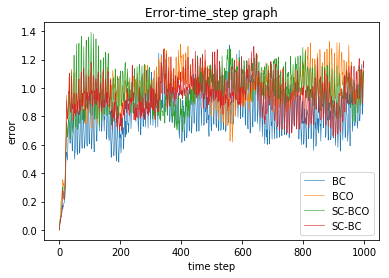

In [2485]:
horizon=1000
x = np.arange(horizon)
fig, ax = plt.subplots()
ax.plot(x, BC_error_seq[0:horizon], label='BC', linewidth=0.6)
ax.plot(x, BCO_error_seq[0:horizon], label='BCO', linewidth=0.6) 
ax.plot(x, SCBCO_error_seq[0:horizon], label='SC-BCO', linewidth=0.6) 
ax.plot(x, SCBC_error_seq[0:horizon], label='SC-BC', linewidth=0.6) 
ax.set_xlabel('time step')  # Add an x-label to the axes.
ax.set_ylabel('error')  # Add a y-label to the axes.
ax.set_title("Error-time_step graph")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.savefig('imgs/error_graph.jpg')

## BCO($\alpha$)

In [ ]:
EPOCHS = 20
M = 5000
EPS = 0.9
DECAY = 0.0

In [86]:
trajs_inv = []

for e in tqdm(range(EPOCHS)):
    
    # step1, generate inverse samples
    cnt = 0
    epn = 0
    
    rews = 0
        
    while True:
        traj = []
        rew = 0
            
        obs = env.reset()
        while True:
            inp = T.from_numpy(obs).view(((1, )+obs.shape)).float().cuda()
            out = model.pred_act(inp).cpu().detach().numpy()
                
            if np.random.rand()>=EPS:
                act = out[0]
            else:
                act = env.action_space.sample()
                
            new_obs, r, done, _ = env.step(act)
                
            traj.append([obs, act, new_obs])
            obs = new_obs
            rew += r
            
            cnt += 1
                
            if done==True:
                rews += rew
                trajs_inv.append(traj)
                
                epn += 1
                
                break
        
        if cnt >= M:
            break
        
    rews /= epn
    print('Ep %d: reward=%.2f' % (e+1, rews))
        
    # step2, update inverse model
    ld_inv = DataLoader(DS_Inv(trajs_inv), batch_size=32, shuffle=True)
    
    with tqdm(ld_inv) as TQ:
        ls_ep = 0
        
        for obs1, obs2, act in TQ:
            out = model.pred_inv(obs1.float().cuda(), obs2.float().cuda())
            ls_bh = loss_func(out, act.cuda())
            
            optim.zero_grad()
            ls_bh.backward()
            optim.step()
            
            ls_bh = ls_bh.cpu().detach().numpy()
            TQ.set_postfix(loss_inv='%.3f' % (ls_bh))
            ls_ep += ls_bh
        
        ls_ep /= len(TQ)
        print('Ep %d: loss_inv=%.3f' % (e+1, ls_ep))
    
    # step3, predict inverse action for demo samples
    traj_policy = []
    
    for obs1, obs2, _ in ld_demo:
        out = model.pred_inv(obs1.float().cuda(), obs2.float().cuda())
        
        obs = obs1.cpu().detach().numpy()
        out = out.cpu().detach().numpy()
        
        for i in range(100):
            traj_policy.append([obs[i], out[i]])
    
    # step4, update policy via demo samples
    ld_policy = DataLoader(DS_Policy(traj_policy), batch_size=32, shuffle=True)
    
    with tqdm(ld_policy) as TQ:
        ls_ep = 0
        
        for obs, act in TQ:
            out = model.pred_act(obs.float().cuda())
            ls_bh = loss_func(out, act.cuda())
            
            optim.zero_grad()
            ls_bh.backward()
            optim.step()
            
            ls_bh = ls_bh.cpu().detach().numpy()
            TQ.set_postfix(loss_policy='%.3f' % (ls_bh))
            ls_ep += ls_bh
        
        ls_ep /= len(TQ)
        print('Ep %d: loss_policy=%.3f' % (e+1, ls_ep))
    
    # step5, save model
    T.save(model.state_dict(), 'Model/model_reacher_%d.pt' % (e+1))
    
    EPS *= DECAY

Ep 1: reward=-41.51


Ep 1: loss_inv=0.209


Ep 1: loss_policy=0.003
Ep 2: reward=-11.53


Ep 2: loss_inv=0.037


Ep 2: loss_policy=0.004
Ep 3: reward=-11.92


Ep 3: loss_inv=0.014


Ep 3: loss_policy=0.003
Ep 4: reward=-11.27


Ep 4: loss_inv=0.008


Ep 4: loss_policy=0.003
Ep 5: reward=-12.03


Ep 5: loss_inv=0.005


Ep 5: loss_policy=0.002
Ep 6: reward=-12.42


Ep 6: loss_inv=0.004


Ep 6: loss_policy=0.002
Ep 7: reward=-13.06


Ep 7: loss_inv=0.003


Ep 7: loss_policy=0.002
Ep 8: reward=-12.58


Ep 8: loss_inv=0.003


Ep 8: loss_policy=0.002
Ep 9: reward=-12.28


KeyboardInterrupt: 